Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then step by step run the code blocks. If you pass all code blocks, remember to **Save** and **Submit** your notebook to the system.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Nguyễn Duy Đạt"

---

# WORD2VEC TUTORIAL - Mô hình hóa từ ngữ với Word2Vec

*Word2vec* (W2V) là một mô hình đơn giản và nổi tiếng giúp tạo ra các *biểu diễn* (*embedding*) của từ trong một không gian vector:
- Có số chiều biểu diễn **thấp hơn nhiều lần** so với cách sử dụng từ điển (hàng trăm so với hàng triệu chiều)
- Các từ có có **tính chất giống nhau** thì biểu diễn trong không gian embedding cũng **tương tự nhau**

*Word2vec* sau đó được sử dụng như là bước xử lý đầu vào bắt buộc cho nhiều bài toán/mô hình sau này.

Ý tưởng cơ bản của word2vec có thể được gói gọn trong các ý sau:

1. Hai từ xuất hiện trong những văn cảnh giống nhau thường có ý nghĩa gần với nhau.

2. Ta có thể đoán được một từ nếu biết các từ xung quanh nó trong câu. Ví dụ, với câu “Hà Nội là … của Việt Nam” thì từ trong dấu ba chấm khả năng cao là “thủ đô”. Với câu hoàn chỉnh “Hà Nội là thủ đô của Việt Nam”, mô hình word2vec sẽ xây dựng ra embedding của các từ sao cho xác suất để từ trong dấu ba chấm là “thủ đô” là cao nhất.

(Trích *[machinelearningcoban.com](https://machinelearningcoban.com/tabml_book/ch_embedding/word2vec.html)*)



## Phần 1. Word2Vec với thư viện GenSim

Khai báo các thư viện và hàm cần dùng

In [2]:
# Sử dụng thư viện GenSim cho Word2Vec
import gensim
from numpy import dot
from numpy.linalg import norm
import numpy as np

cos_sim = lambda a,b: dot(a, b)/(norm(a)*norm(b))

### Tải mô hình huấn luyện sẵn

Mô hình Word2Vec được huấn luyện sẵn với một lượng lớn dữ liệu (hàng triệu văn bản), sử dụng nhiều tài nguyên tính toán GPUs và có thể tốn đến hàng tuần để huấn luyện. Do đó, việc tận dụng mô hình huấn luyện sẵn là phương án khả thi và phù hợp với đại đa số người dùng. 

Để tải mô hình Word2Vec huấn luyện sẵn, các bạn có thể sử dụng lệnh 'wget' với đường dẫn đã được chuẩn bị sẵn ở phần code. Để biết thêm thông tin về mô hình này, các bạn có thể tham khảo đường dẫn sau: https://fasttext.cc

Sẽ mất khoảng 1 phút để tải và giải nén mô hình tùy thuộc vào tốc độ mạng của bạn.

**Ở đây, server đã tải sẵn cho các bạn mô hình này, các bạn chỉ cần sử dụng.** 

**Việc tải về file và giải nén chỉ cần thiết khi các bạn sử dụng trên các nền tảng khác(Ví dụ Colab)**

In [ ]:
# Tải file nén mô hình W2V đã được huấn luyện
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

# Giải nén file mô hình
# !unzip wiki-news-300d-1M.vec.zip

Chúng ta sẽ sử dụng thư viện 'gensim' để load mô hình đã tải về. Các bạn đợi khoảng 3-4 phút nhé!

In [136]:
model_path = '/data/cs2230/wiki-news-300d-1M.vec'
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=False)

### Các thao tác cơ bản


Ở bước đầu tiên này, chúng ta cùng xem thử mô hình W2V biểu diễn một 'token' bất kì dưới dạng vector đặc trưng như thế nào nhé!

Lấy ví dụ, chúng ta cùng thử với từ khóa `'king'` trở thành một vector 300 chiều.

In [8]:
king_vec = None

# TODO: Đưa từ khóa 'king' làm input để mô hình huấn luyện sẵn dự đoán ra vector biểu diễn của nó
# YOUR CODE HERE
king_vec = model.get_vector('king')

Dưới đây chính là cách mà mô hình W2V hiểu về từ khóa `'king'` mà chúng ta vừa đưa vào mô hình:

In [9]:
print(king_vec)

[ 1.082e-01  4.450e-02 -3.840e-02  1.100e-03 -8.880e-02  7.130e-02
 -6.960e-02 -4.770e-02  7.100e-03 -4.080e-02 -7.070e-02 -2.660e-02
  5.000e-02 -8.240e-02  8.480e-02 -1.627e-01 -8.510e-02 -2.950e-02
  1.534e-01 -1.828e-01 -2.208e-01  2.430e-02 -9.210e-02 -1.089e-01
 -1.009e-01 -1.190e-02  3.770e-02  2.038e-01  7.200e-02  2.020e-02
  2.798e-01  1.150e-02 -1.510e-02  1.037e-01  4.000e-04 -1.040e-02
  1.960e-02  1.265e-01  8.280e-02 -1.369e-01  1.070e-01  1.270e-01
 -3.490e-02 -6.830e-02 -1.140e-02  3.370e-02  1.260e-02  7.920e-02
  4.400e-02 -2.530e-02  4.890e-02 -7.850e-02 -6.259e-01 -9.720e-02
  1.654e-01 -5.780e-02 -4.370e-02  4.090e-02 -1.820e-02 -1.891e-01
  2.770e-02 -1.460e-02 -5.310e-02  4.260e-02  4.900e-03  4.000e-03
  1.423e-01 -9.750e-02 -3.500e-03  9.630e-02 -1.900e-03 -1.466e-01
 -1.662e-01  6.650e-02 -1.500e-01 -1.267e-01  2.670e-02 -1.560e-01
 -1.442e-01  1.515e-01  2.420e-02 -6.080e-02  9.180e-02 -2.407e-01
 -4.110e-02 -1.420e-02  6.550e-02 -3.590e-02  1.459e-01  9.400

In [10]:
# Kiểm tra một số phần tử trong vector biểu diễn
assert king_vec[0] - 0.1082 < 1e-9
assert king_vec[200] - 0.0086 < 1e-9

In [11]:
# Kiểm tra với bộ test ẩn

Những con số mà chúng ta thấy ở trên, chắc chắn chúng ta sẽ không hiểu ý nghĩa của chúng. Thế nhưng, mô hình W2V sẽ hiểu và có thể dùng những con số này để so sánh tính tương đồng giữa các từ khóa mà chúng ta đưa vào mô hình.

Làm ví dụ dưới đây để thấy mối quan hệ giữa `king` và `queen` sẽ có tính tương đồng cao hơn so với `king` và `car`:

In [13]:
# TODO: Tương tự như việc tạo ra vector biểu diễn của `king`, các bạn hãy tạo ra vector biểu diễn cho `queen` và `car`
queen_vec = None
car_vec = None

# YOUR CODE HERE
queen_vec = model.get_vector('queen')
car_vec = model.get_vector('car')

In [14]:
# Kiểm tra một số phần tử trong vector biểu diễn
assert queen_vec[0] - 0.2158 < 1e-8
assert car_vec[200] + 0.0224 < 1e-8

In [15]:
# Kiểm tra với bộ test ẩn

Chúng ta có thể sử dụng `cosine similarity` để đo độ tương đồng giữa các vector biểu diễn này.

In [44]:
# TODO: Tính độ tương đồng cosine similarity của `king` và `queen`:

king_queen_sim = None
# YOUR CODE HERE
king_queen_sim = cos_sim(king_vec, queen_vec)
print('Độ tương đồng của `king` và `queen` là:', king_queen_sim)

Độ tương đồng của `king` và `queen` là: 0.7638539


In [ ]:
# Kiểm tra với bộ test ẩn

Hãy thử với nhiều cặp từ hơn để hiểu hơn về độ tương đồng giữa chúng. 
Nếu từ khóa A và từ khóa B có ý nghĩa tương tự, vector biểu diễn của chúng cũng sẽ tương đồng với nhau, vì thế độ tương đồng trả về sẽ có giá trị cao hơn.

Cùng thử với các từ khóa sau: `'like'`, `'love'` và `'hate'`.

CÁCH 1: Sử dụng DOT PRODUCT

In [22]:
words = [
    'like love',
    'like hate',
    'love hate',
]
w1_w2_sim_storage = []

for w in words:
    w1, w2 = w.split()

    # TODO: Tính độ tương đồng của các cặp từ đã cho trong list `words` sử dụng DOT PRODUCT
    w1_w2_sim = None
    # YOUR CODE HERE
    w1_vec = model.get_vector(w1)
    w2_vec = model.get_vector(w2)
    w1_w2_sim = dot(w1_vec, w2_vec)
    w1_w2_sim_storage.append(w1_w2_sim)

    print(f"Độ tương đồng của {w1} và {w2} là:", w1_w2_sim)

Độ tương đồng của like và love là: 1.609117
Độ tương đồng của like và hate là: 1.8135115
Độ tương đồng của love và hate là: 2.8157127


In [23]:
assert w1_w2_sim_storage[0] *2 - 3.2 < 2e-1
assert w1_w2_sim_storage[1] *2 - 3.5 < 2e-1
assert w1_w2_sim_storage[2] *2 - 5.5 < 2e-1

In [24]:
# Kiểm tra với bộ test ẩn

CÁCH 2: Sử dụng độ tương đồng tính theo khoảng cách cosine

In [45]:
words = [
    'like love',
    'like hate',
    'love hate',
]
w1_w2_sim_storage = []

for w in words:
    w1, w2 = w.split()

    # TODO: Tính độ tương đồng của các cặp từ đã cho trong list `words`
    w1_w2_sim = None
    # YOUR CODE HERE
    w1_vec = model.get_vector(w1)
    w2_vec = model.get_vector(w2)
    w1_w2_sim = cos_sim(w1_vec, w2_vec)
    w1_w2_sim_storage.append(w1_w2_sim)

    print(f"Độ tương đồng của {w1} và {w2} là:", w1_w2_sim)

Độ tương đồng của like và love là: 0.50099474
Độ tương đồng của like và hate là: 0.52742887
Độ tương đồng của love và hate là: 0.712714


In [26]:
assert w1_w2_sim_storage[0] *2 - 1 < 1e-2
assert w1_w2_sim_storage[1] *2 - 1 < 1e-1
assert w1_w2_sim_storage[2] *2 - 1 < 1e-0

In [27]:
# Kiểm tra với bộ test ẩn

Độ tương đồng tính bằng khoảng cách cosine của `love` và `hate` là bao nhiêu?

In [28]:
options = ['khoảng 50%', 
           'khoảng 60%', 
           'khoảng 70%', 
           'khoảng 80%']
your_choice = None

# Hãy chọn your_choice bằng 0, 1, 2 hoặc 3 tương ứng với các lựa chọn ở trên
# YOUR CODE HERE
your_choice = 2

print("Độ tương đồng tính bằng khoảng cách cosine của `love` và `hate` là", options[your_choice])

Độ tương đồng tính bằng khoảng cách cosine của `love` và `hate` là khoảng 70%


In [29]:
# Bộ test ẩn

Trong thực tế, `'love'` và `'hate'` có ngữ nghĩa trong tiếng Anh khác biệt nhau hoàn toàn, yêu thương so với ghét bỏ, trong khi `'love'` và `like'` lại rất khác nhau. 
Chúng ta có thể dùng từ điển để so sánh ngữ nghĩa của những từ này!

Tại sao `'love'` và `'hate'` lại có độ tương đồng cao hơn `'love'` và `like'`?



In [30]:
options = ["'love' và 'hate' cùng là ngoại động từ", 
           "'love' và 'hate' cùng thể hiện một mức độ cảm xúc tương tự nhau", 
           "'love' và 'like' cùng thể hiện sự yêu thích", 
           "'love' và 'like' cùng thể hiện một mức độ cảm xúc tương tự nhau"]
your_choice = None

# Hãy chọn your_choice bằng 0, 1, 2 hoặc 3 tương ứng với các lựa chọn ở trên
# YOUR CODE HERE
your_choice = 1

print("'love' và 'hate' có độ tương đồng cao hơn 'love' và like' vì", options[your_choice])

'love' và 'hate' có độ tương đồng cao hơn 'love' và like' vì 'love' và 'hate' cùng thể hiện một mức độ cảm xúc tương tự nhau


In [31]:
# Bộ test ẩn

In [55]:
classes  = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck",]
matrix = None

# TODO: dùng mô hình W2V để rút trích đặc trưng và tính ma trận độ tương đồng 
# giữa các lớp trong cifar10. `matrix` thể hiện độ tượng đồng giữa các lớp:
# ví dụ: matrix[0, 1], và matrix[1, 0] là độ tương động giữa "airplane" và "automobile"
# Lưu ý: độ tương đồng giữa "airplane" và "airplane", tức matrix[0, 0] =1

# YOUR CODE HERE
classes_vec = list(map(lambda name: model.get_vector(name), classes))
matrix = []
for i in range(len(classes)):
    cos_sim_1_row = list(map(lambda name: cos_sim(classes_vec[i], name), classes_vec))
    matrix.append(cos_sim_1_row)
matrix = np.array(matrix)

In [56]:
# Kiểm tra với bộ test
assert matrix.shape == (len(classes), len(classes))
assert (matrix-matrix.T<1e-8).all()
assert matrix[0, 0] -1 < 1e-4

In [ ]:
# Kiểm tra với bộ test ẩn

<AxesSubplot: >

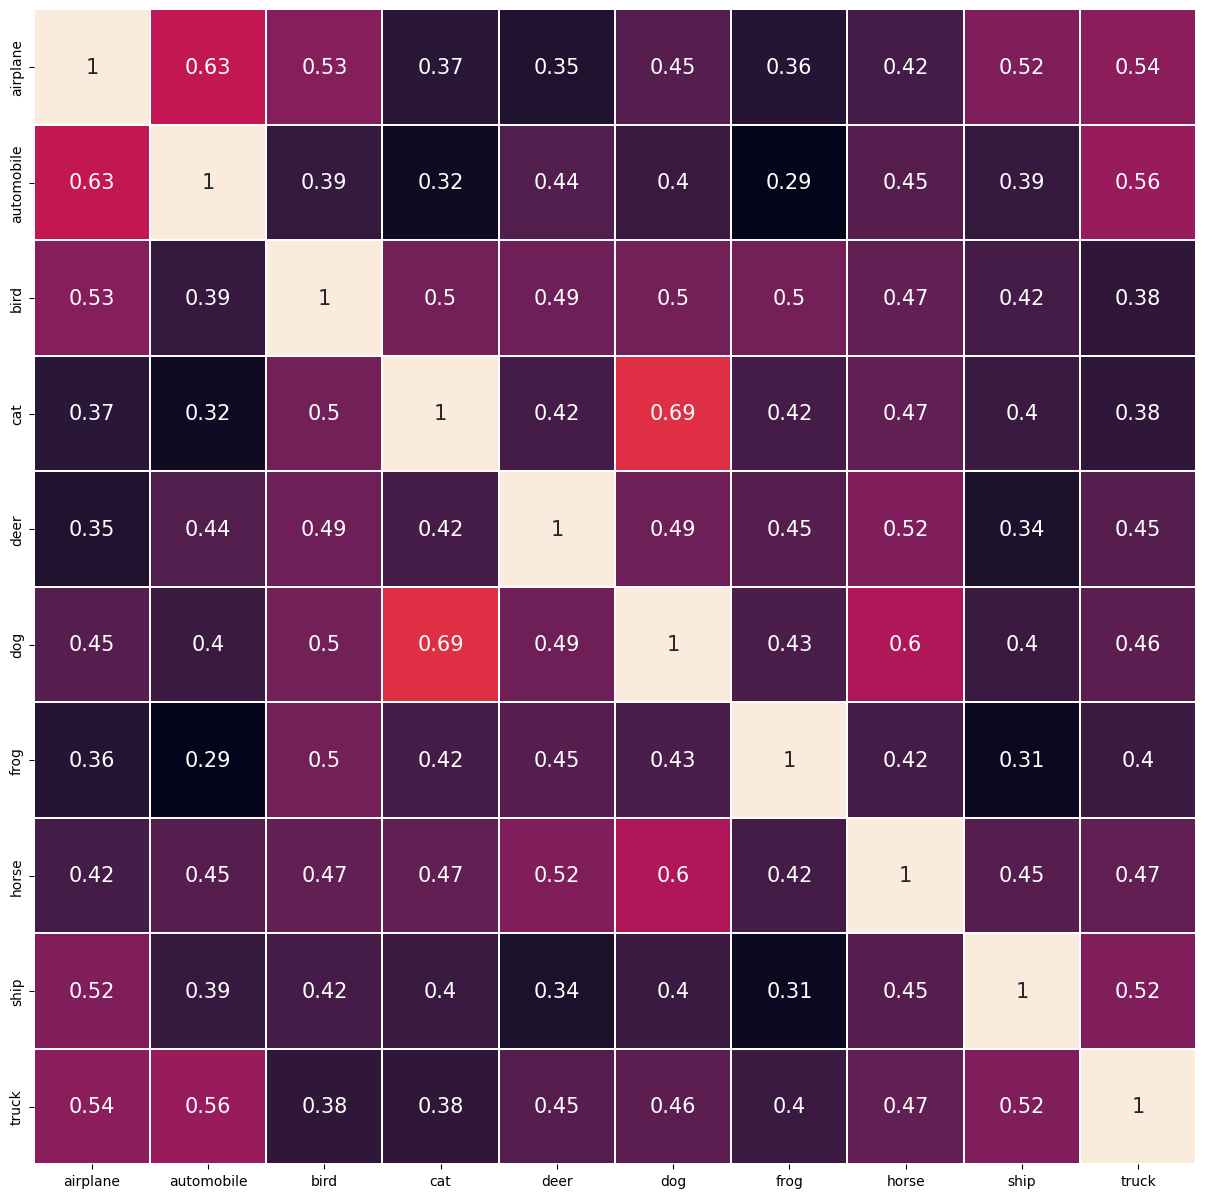

In [57]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

pd_matrix = pd.DataFrame(np.around(matrix, 2), index=classes, columns=classes)
plt.figure(figsize = (15,15))
sn.heatmap(pd_matrix, annot=True, cbar=False, linewidths=0.01, annot_kws={"fontsize":15})

### Quy tắc ngôn ngữ học
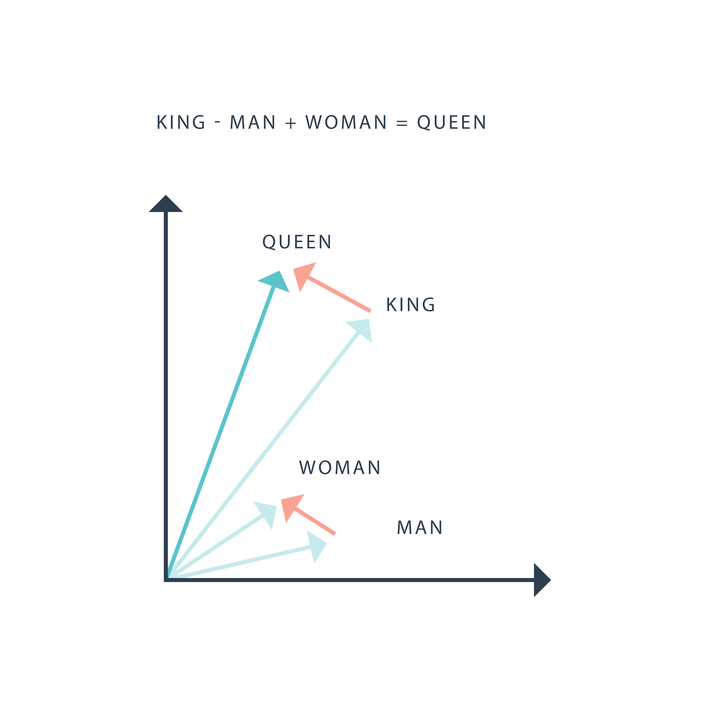


Từ hình minh họa, ta có thể thấy vector từ bao hàm nhiều quy tắc về ngôn ngữ, ví dụ 

vector `model['king'] - model['man'] + model['woman']` sẽ biểu thị `model['queen']`.

Chúng ta có thể dùng phương thức `.most_similar()` để hiện thực hóa yêu cầu trên.

In [58]:
# TODO: Hiện thực hóa yêu cầu trên và kiểm tra xem từ khóa nào được mô hình cho là tương đồng nhất với `king - man + woman`

most_similar_list = None
# YOUR CODE HERE
most_similar_list = model.most_similar(positive=['king', 'woman'], negative=['man'])

print(f'Mô hình cho rằng: king - man + woman = {most_similar_list[0][0]} với độ tương đồng cao nhất là {most_similar_list[0][1]}')

Mô hình cho rằng: king - man + woman = queen với độ tương đồng cao nhất là 0.7515912055969238


In [59]:
assert most_similar_list[2][1] - 0.671 < 1e-3
assert most_similar_list[5][0] == 'royal'

In [ ]:
# Kiểm tra với bộ test ẩn

Hãy cùng thử hỏi model W2V xem liệu `'king'` là `'man'` thì `'queen'` sẽ là gì nhỉ?

Hidden: Gợi ý: king + queen - man


In [60]:
# TODO: Hiện thực hóa yêu cầu trên và kiểm tra xem từ khóa nào được mô hình cho là tương đồng nhất

most_similar_list = None
# YOUR CODE HERE
most_similar_list = model.most_similar(positive=['king', 'queen'], negative=['man'])

print(f'Mô hình trả về từ khóa {most_similar_list[0][0]} với độ tương đồng cao nhất là {most_similar_list[0][1]}')

Mô hình trả về từ khóa queens với độ tương đồng cao nhất là 0.6644245982170105


In [61]:
assert most_similar_list[1][1] - 0.603 < 1e-3
assert most_similar_list[6][0] == 'princess'

In [ ]:
# Kiểm tra với bộ test ẩn

### Bài tập
Các bạn có thể trải nghiệm thêm với các cặp quan hệ sau:

- Capital - Country (Thủ đô - Đất nước)
- Noun - Plural form (Danh từ - Dạng số nhiều của danh từ)
- Verb - V3 form (Động từ - Dạng quá khứ phân từ của động từ)

In [137]:
# TODO: Thử nghiệm với câu hỏi "Thủ đô của Việt Nam là Hà Nội, vậy thủ đô của Nhật Bản là gì?"

result_list = None
# YOUR CODE HERE
result_list = model.most_similar(positive=['Vietnam', 'Japan'], negative=['Hanoi'])

print("Thủ đô của Việt Nam là Hà Nội, vậy thủ đô của Nhật Bản là:", result_list[0][0])

Thủ đô của Việt Nam là Hà Nội, vậy thủ đô của Nhật Bản là: Korea


In [138]:
assert result_list[2][1] - 0.687 < 1e-3
assert result_list[4][0] == 'Yokohama'

AssertionError: 

In [ ]:
# Kiểm tra với bộ test ẩn

Các bạn cùng thử nghiệm với các cặp quan hệ còn lại và nêu nhận xét của mình về khả năng của mô hình được huấn luyện sẵn này nhé!


## Phần 2. Word2vec với framework hỗ trợ Tensorflow

### Tải mô hình huấn luyện sẵn

Tensorflow cũng cung cấp nhiều mô hình được huấn luyện sẵn cho tác vụ vector hóa từ, chúng ta có thể dùng Tensorflow Hub để tải và sử dụng các mô hình này.

Các bạn chờ khoảng 1 phút để mô hình được tải về nhé!

In [ ]:
# pip install tensorflow_hub

In [98]:
import tensorflow_hub as hub
# embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")
model_path="/data/cs2230/Wiki-words-250-with-normalization_2"
embed = hub.load(model_path)

### Các thao tác cơ bản

Để lấy được vector biểu diễn từ, chúng ta sử dụng `.numpy()` sau output của mô hình.

In [126]:
# TODO: Sử dụng mô hình được Tensorflow hỗ trợ để lấy vector biểu diễn của các từ khóa `love`, `like`, và `hate`
love_vec, like_vec, hate_vec = None, None, None

# YOUR CODE HERE
love_vec = embed(['love']).numpy()
like_vec = embed(['like']).numpy()
hate_vec = embed(['hate']).numpy()

In [127]:
# Kiểm tra một số phần tử trong vector biểu diễn
assert love_vec[0][0] + 0.033035338 < 1e-6
assert like_vec[0][200] + 0.03201509 < 1e-6
assert hate_vec[0][222] + 0.0048128446 < 1e-6

In [ ]:
# Kiểm tra với bộ test ẩn

Tương tự như đã làm với thư viện `gensim` ở Phần 1, chúng ta cùng so sánh độ tương đồng giữa vector biểu diễn của những từ này nhé.

In [130]:
words = [
    'like love',
    'like hate',
    'love hate',
]
w1_w2_sim_storage = []

for w in words:
    w1, w2 = w.split()

    # TODO: Tính độ tương đồng của các cặp từ đã cho trong list `words`
    w1_w2_sim = None
    # YOUR CODE HERE
    w1_vec = embed([w1]).numpy()
    w2_vec = embed([w2]).numpy()
    w1_w2_sim = cos_sim(w1_vec[0], w2_vec[0])
    w1_w2_sim_storage.append(w1_w2_sim)

    print(f"Độ tương đồng của {w1} và {w2} là:", w1_w2_sim)

Độ tương đồng của like và love là: 0.24091528
Độ tương đồng của like và hate là: 0.25267747
Độ tương đồng của love và hate là: 0.5915959


In [131]:
assert w1_w2_sim_storage[0] *4 - 4/4 < 1e-2
assert w1_w2_sim_storage[1] *3 - 3/4 < 1e-2
assert w1_w2_sim_storage[2] *2 - 4/4 < 3e-1

In [ ]:
# Kiểm tra với bộ test ẩn

Độ tương đồng tính bằng khoảng cách cosine của `love` và `hate` là bao nhiêu?

In [132]:
options = ['khoảng 60%', 
           'khoảng 70%', 
           'khoảng 80%', 
           'khoảng 90%']
your_choice = None

# Hãy chọn your_choice bằng 0, 1, 2 hoặc 3 tương ứng với các lựa chọn ở trên
# YOUR CODE HERE
your_choice = 0

print("Độ tương đồng tính bằng khoảng cách cosine của `love` và `hate` là", options[your_choice])

Độ tương đồng tính bằng khoảng cách cosine của `love` và `hate` là khoảng 60%


In [ ]:
# Bộ test ẩn

Giống với `gensim`, chúng ta có thể sử dụng phép nhân dot product để tính toán độ tương đồng giữa các vector biểu diễn từ khóa.

Hãy cùng thử tương tự với các từ khóa và so sánh kết quả với `gensim` nhé!

In [133]:
words = [
    'like love',
    'like hate',
    'love hate',
]
w1_w2_sim_storage = []

for w in words:
    w1, w2 = w.split()

    # TODO: Tính độ tương đồng của các cặp từ đã cho trong list `words` sử dụng DOT PRODUCT
    w1_w2_sim = None
    # YOUR CODE HERE
    w1_vec = embed([w1]).numpy()
    w2_vec = embed([w2]).numpy()
    w1_w2_sim = dot(w1_vec[0], w2_vec[0])
    w1_w2_sim_storage.append(w1_w2_sim)

    print(f"Độ tương đồng của {w1} và {w2} là:", w1_w2_sim)

Độ tương đồng của like và love là: 0.24091528
Độ tương đồng của like và hate là: 0.25267747
Độ tương đồng của love và hate là: 0.5915959


In [134]:
assert w1_w2_sim_storage[0] *4 - 4/4 < 1e-2
assert w1_w2_sim_storage[1] *3 - 3/4 < 1e-2
assert w1_w2_sim_storage[2] *2 - 4/4 < 3e-1

In [ ]:
# Kiểm tra với bộ test ẩn

Độ tương đồng tính bằng khoảng cách cosine của `love` và `hate` là bao nhiêu?

In [135]:
options = ['khoảng 60%', 
           'khoảng 70%', 
           'khoảng 80%', 
           'khoảng 90%']
your_choice = None

# Hãy chọn your_choice bằng 0, 1, 2 hoặc 3 tương ứng với các lựa chọn ở trên
# YOUR CODE HERE
your_choice = 0

print("Độ tương đồng tính bằng khoảng cách cosine của `love` và `hate` là", options[your_choice])

Độ tương đồng tính bằng khoảng cách cosine của `love` và `hate` là khoảng 60%


In [ ]:
# Bộ test ẩn

**HẾT**